# Visualising outbreak curves

## Reading and cleaning  the data

Import things

In [40]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib as mpl
import os
import pylab as plt
import geopandas as gpd
import adjustText as aT
import seaborn as sns
sns.set(style="darkgrid")

In [39]:
from os.path import isfile, join
path = '/Users/sophieayling/Documents/GitHub/Disease-Modelling-SSA/data/output/'
path_raw = '/Users/sophieayling/Documents/GitHub/Disease-Modelling-SSA/data/raw/'

COMPARE TO [this](https://ourworldindata.org/covid-deaths)

## 1. Plotting the Ordering of Districts

### Observing while running

Progress can be observed as they're running - just add the file to which the simulation is exporting below!

**NOTE: MAKE SURE YOU HAVE A TEXT FILE IN THE SAME DIRECTORY AS THIS FILE CONTAINING THE 'TRUE' ORDER OF FILES!**

This file should be formatted as follows:

```
day	districtId
1	1
1	2
...
```

Please note that it is TAB DELIMITED - if your data is not, then you will need to update the csv readin below.

In [67]:
# set my path when running the file from here


# read and clean the data
results_filename = (path+'exportMe9927.txt')
r_data = pd.read_csv(results_filename, sep='\t')
r_data['districtId'] = [int(str(x).split('_')[1]) for x in r_data["myId"]] # she is renaming districtid myId


# filter out case data
cases = r_data[(r_data.metric_new_cases_sympt > 0) | (r_data.metric_new_cases_asympt > 0)]
cases.head()

# group by districts and sort by time
byDistric = cases.groupby('districtId').agg({'time': 'min'})
byDistric.sort_values(by="time")

# sophie adding want to rename 'time' to denote the day of simulation
byDistric.rename(columns={'time':'simDay'}, inplace=True)

byDistric.head()

# read in the first districts cases data (what she called 'gold standard data')
gold_filename = (path+"../preprocessed/line_list/true.txt")
g_data = pd.read_csv(gold_filename, sep='\t')
g_data["trueDay"] = [int(x) for x in g_data['day']] ## Sophie not using this 

# join the simulated and gold standard data based on the district ID
comparison = g_data.join(byDistric, on='districtId', lsuffix='_gold', rsuffix='_sim')
comparison['simDay'] = comparison['simDay'].fillna(0) # you may wish to set the unfound districts to some default
comparison['trueDay']= comparison['trueDay'].fillna(0)
#comparison # show the results
comparison.head()
comparison.to_csv(path+'comparison.csv')

In [7]:
myslice = pd.isna(comparison['simDay']) # see all of the districts where there were cases in both sim and true days 
#print(comparison[-myslice]) # showing the districts where the cases occured in both simulation and true data
both_sa= comparison[-myslice]
myslice.head()

0    False
1    False
2    False
3    False
4    False
Name: simDay, dtype: bool

/opt/anaconda3/envs/i2p/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


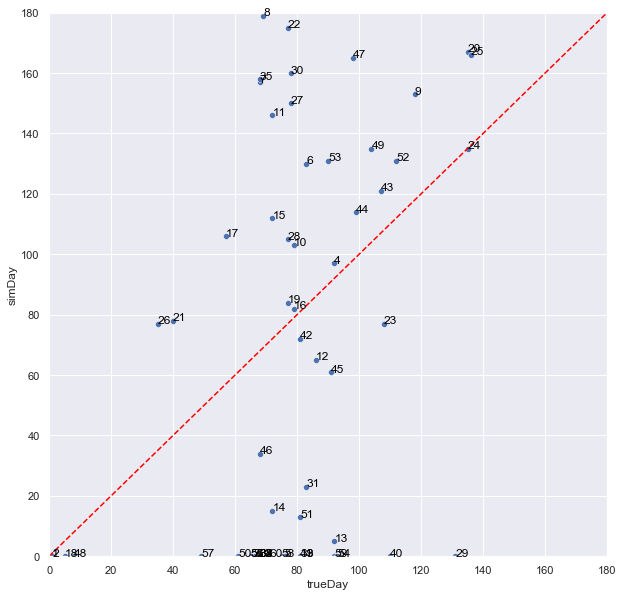

In [62]:
fig, ax = plt.subplots (figsize = (10,10))
ax= sns.scatterplot(
             x="trueDay", 
             y="simDay",
             #y="metric_new_hospitalized",
             #y="metric_new_cases_sympt", 
             palette="colorblind", 
            # hue="districtId",
             data=comparison, #,
            #legend=True
            )
            #.legend(bbox_to_anchor= (1.03, 1) )
            
 # add labels to values on product id
for line in range(0,comparison.shape[0]):
    ax.text(comparison.trueDay[line] +0.01, comparison.simDay[line],
           comparison.districtId[line], horizontalalignment='left',
           size='medium', color='black', weight ='light')

ax.set(xlim=(0, 180), ylim=(0, 180)) # in true day the max first day is 136, in sim the max first day is 179
xl, yl = [0,180], [0,180]
sns.lineplot(xl, yl, linestyle='--', color='red')

plt.savefig(path+'plots/sim_vs_true_firstcases.png', dpi=300,  facecolor='w', edgecolor='w', transparent=True)


### 2. Mapping the difference between simulated and true timing

### First just map the Zim districts 

/opt/anaconda3/envs/i2p/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


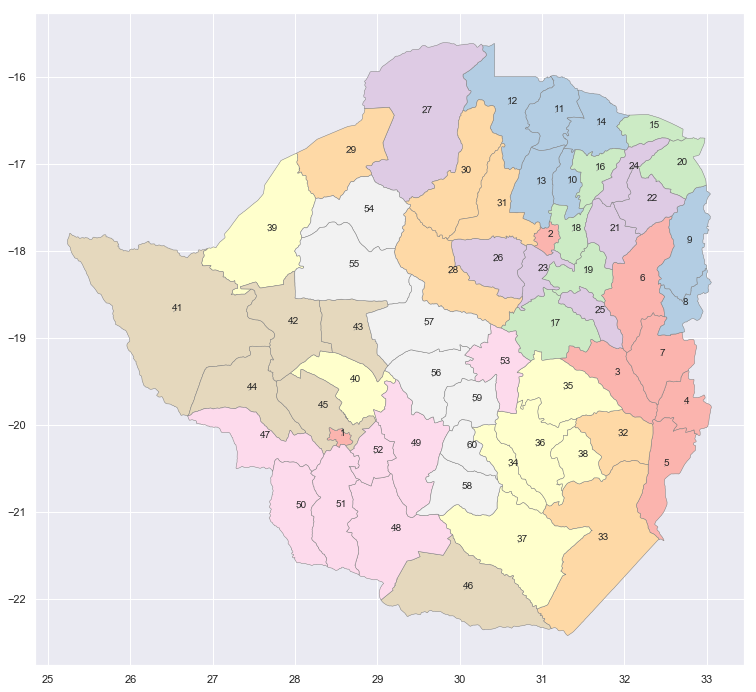

In [53]:
zw["center"] = rawLocs["geometry"].centroid
zw_points = zw.copy()
zw_points.set_geometry("center", inplace = True)

ax = zw.plot(figsize = (15, 12), cmap = "Pastel1", edgecolor = "grey", linewidth = 0.5)
texts = []

for x, y, label in zip(zw_points.geometry.x, zw_points.geometry.y, zw_points["ID_2"]):
    texts.append(plt.text(x, y, label, fontsize = 10))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

plt.savefig(path+'maps/numbered_districts.png', dpi=300,  facecolor='w', edgecolor='w', transparent=True)


/opt/anaconda3/envs/i2p/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


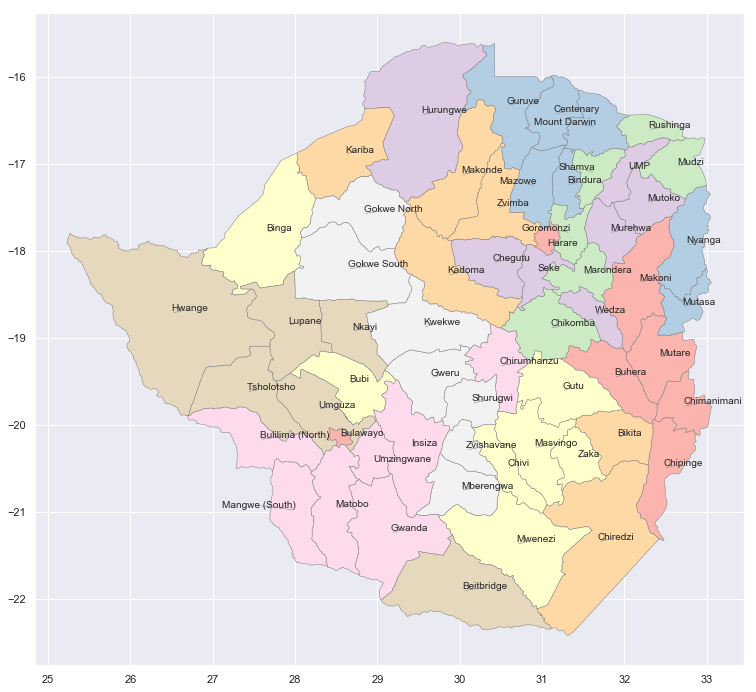

In [54]:
zw["center"] = rawLocs["geometry"].centroid
zw_points = zw.copy()
zw_points.set_geometry("center", inplace = True)

ax = zw.plot(figsize = (15, 12), cmap = "Pastel1", edgecolor = "grey", linewidth = 0.5)
texts = []

for x, y, label in zip(zw_points.geometry.x, zw_points.geometry.y, zw_points["NAME_2"]):
    texts.append(plt.text(x, y, label, fontsize = 10))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

plt.savefig(path+'maps/named_districts.png', dpi=300,  facecolor='w', edgecolor='w', transparent=True)


In [81]:
# calculate the delta between true and simulated first recorded cases in number of days
comparison['diff'] = comparison['trueDay'] - comparison['simDay']
# convert nans to zeros on the diff field
comparison['diff'] = comparison['diff'].fillna(0) 
comparison.head()

,day,districtId,district_name_shpfile,cases_by_district_per_day,tot_cases_by_district,trueDay,simDay,diff
0,1,1,Bulawayo,1,1044,1,0.0,1.0
1,5,18,Goromonzi,1,35,5,0.0,5.0
2,35,26,Chegutu,3,104,35,77.0,-42.0
3,40,21,Murehwa,1,26,40,78.0,-38.0
4,57,17,Chikomba,1,17,57,106.0,-49.0


In [83]:
# read in spatial data
# rawLocs = geopandas.read_file("/Users/swise/workspace/worldbank/Disease-Modelling-SSA/data/raw/shapefiles/new_districts/ZWE_adm2.shp")
# trunkRoads = geopandas.read_file("/Users/swise/workspace/worldbank/Disease-Modelling-SSA/data/raw/shapefiles/osm_trunk_roads.shp")

zw = gpd.read_file(path_raw +"shapefiles/new_districts/ZWE_adm2.shp")
trunkRoads = gpd.read_file(path_raw + "shapefiles/zwe_roads/Final_Zimbabwe_Roads_Version01.shp")



# merge the comparison data with the spatial district data on the district ID
dataLocs = zw.merge(comparison, how="left", left_on=['ID_2'], right_on=['districtId'])

# there are some districts with no comparison data because they don't have data? 
dataLocs.isna().sum()

ID_0                          0
ISO                           0
NAME_0                        0
ID_1                          0
NAME_1                        0
ID_2                          0
NAME_2                        0
TYPE_2                        0
ENGTYPE_2                     0
NL_NAME_2                    60
VARNAME_2                    36
geometry                      0
day                           0
districtId                    0
district_name_shpfile         0
cases_by_district_per_day     0
tot_cases_by_district         0
trueDay                       0
simDay                        0
diff                          0
dtype: int64

Red = simulated was faster than real

Blue = simulated was slower than real

In [85]:
myLim = 180

fig, ax = plt.subplots (figsize = (15,15))
dataLocs.plot("diff", ax = ax, legend=True, cmap='seismic', 
              missing_kwds={"color": "gray", "label": "Missing values",}, vmin=-myLim, vmax=myLim)

#trunkRoads.plot(ax=ax, color="black")

/opt/anaconda3/envs/i2p/lib/python3.7/site-packages/geopandas/plotting.py:376: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

<Figure size 1080x1080 with 2 Axes>

### 3. Exploring multiple sim outputs together

Sets of simulation results can also be explored in the aggregate.

In [72]:
outputFiles = [path+"exportMe9927.txt"]#"exportMe3324.txt", "exportMe4725.txt", "exportMe9812.txt", "exportMe2439.txt", "exportMe5343.txt", 
               #"exportMe6598.txt", "exportMe8992.txt", "exportMe7535.txt", "exportMe217.txt", "exportMe217.txt"]


In [73]:
# a helper function to read in and order a set of districts
def getOrderedDistricts(filename):
    
    # read and clean the data
    r_data = pd.read_csv(filename, sep='\t')
    r_data['districtId'] = [int(str(x).split('_')[1]) for x in r_data["myId"]]
    
    # select the relevant columns, either cases or deaths
    cases = r_data[(r_data.metric_new_cases_sympt > 0) | (r_data.metric_new_cases_asympt > 0)]
    #cases = r_data[r_data.metric_new_deaths > 0]
    
    # group by districts and sort by time
    byDistric = cases.groupby('districtId').agg({'time': 'min'})
    byDistric.sort_values(by="time")
    # sophie adding want to rename 'time' to denote the day of simulation
    byDistric.rename(columns={'time':'simDay'}, inplace=True)
    return byDistric
    
# read in the gold standard data
gold_filename = path+"../preprocessed/line_list/true.txt"
g_data = pd.read_csv(gold_filename, sep='\t')
g_data["trueDay"] = [int(x) for x in g_data['day']]

In [74]:
# iterate through the set of exported results files and append them to one another

simRuns = pd.NA # intial empty file

for x in outputFiles: # iterating over files
    try:
        simRuns = simRuns.append(getOrderedDistricts(x))
    except:
        simRuns = getOrderedDistricts(x)

# aggregate by the mean time associated with the district
simAgg = simRuns.groupby('districtId').agg({'simDay': 'mean'})

In [77]:
# additional helper functions

def getAggDailyCounts(filename):
    r_data = pd.read_csv(filename, sep='\t')
    r_data['districtId'] = [int(str(x).split('_')[1]) for x in r_data["myId"]]
    dailies = r_data.groupby('time').agg({'metric_new_cases_sympt': 'sum', 'metric_new_cases_asympt': 'sum'})
    dailies.sort_values(by="time")
    return dailies

def getRawData(filename):
    r_data = pd.read_csv(filename, sep='\t')
    r_data['districtId'] = [int(str(x).split('_')[1]) for x in r_data["myId"]]
    return r_data

simRuns = pd.NA

for x in outputFiles:
    myCounts = getRawData(x)
    myCounts['key'] = [x for i in range(len(myCounts))]
    try:
        simRuns = simRuns.append(myCounts)
    except:
        simRuns = myCounts

simAgg = simRuns.groupby('time').agg({'metric_new_cases_sympt': 'mean', 'metric_new_cases_asympt': 'mean'})
simAgg.head()

,metric_new_cases_sympt,metric_new_cases_asympt
time,,
0,0.133333,0.2
1,0.000000,0.0
2,0.000000,0.0
3,0.000000,0.0
4,0.000000,0.0
